<a href="https://colab.research.google.com/github/wassima-manssour/Movie-Recommandation-System-Content-Based/blob/main/movie_recommandation_system.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



> 



## **Objective**

- Exploratory data analysis to find interesting insights.
- Developing a content-based recommender system using the genres and/or descriptions.
- Identifying the main content available on the streaming.
- Network analysis on the cast of the titles.


# **Importing Dependencies**

In [1]:
import numpy as np 
import pandas as pd 
import plotly.express as px
import seaborn as sns

import matplotlib.pyplot as plt
import plotly.graph_objects as go
import matplotlib.ticker as ticker
import plotly.figure_factory as ff

import warnings
warnings.filterwarnings('ignore')

# **Getting data from kaggle directly**

*Establishing connection to kaggle*

In [2]:
#install kaggle
!pip install -q kaggle

 #import the json file containing the token downloaded from kaggle account
from google.colab import files
files.upload()

 #create a kaggle folder
! mkdir ~/.kaggle

# copy the kaggle.json to the folder created
! cp kaggle.json ~/.kaggle/

# permession for the json to act
! chmod 600 ~/.kaggle/kaggle.json

# list all datasets in kaggle
! kaggle datasets list


Saving kaggle.json to kaggle.json
ref                                                             title                                               size  lastUpdated          downloadCount  voteCount  usabilityRating  
--------------------------------------------------------------  ------------------------------------------------  ------  -------------------  -------------  ---------  ---------------  
akshaydattatraykhare/diabetes-dataset                           Diabetes Dataset                                     9KB  2022-10-06 08:55:25           6456        210  1.0              
whenamancodes/covid-19-coronavirus-pandemic-dataset             COVID -19 Coronavirus Pandemic Dataset              11KB  2022-09-30 04:05:11           5215        169  1.0              
akshaydattatraykhare/car-details-dataset                        Car Details Dataset                                 56KB  2022-10-21 06:11:56           1163         30  1.0              
whenamancodes/students-performa

*Downloading the dataset*

In [3]:
#https://www.kaggle.com/datasets/victorsoeiro/disney-tv-shows-and-movies?select=credits.csv
! kaggle datasets download victorsoeiro/disney-tv-shows-and-movies

  0% 0.00/718k [00:00<?, ?B/s]
100% 718k/718k [00:00<00:00, 112MB/s]


In [4]:
#!unzip path_to_file.zip -d path_to_directory
! unzip disney-tv-shows-and-movies.zip

Archive:  disney-tv-shows-and-movies.zip
  inflating: credits.csv             
  inflating: titles.csv              


## Importing the Data

This dataset has two files containing the titles (titles.csv) and the cast (credits.csv) for the title.

This dataset contains +1500 unique titles on Disney+ with 15 columns containing their information.

And over +26k credits of actors and directors on Disney+ titles with 5 columns containing their information.

In [5]:
credits = pd.read_csv('/content/credits.csv')
titles = pd.read_csv('/content/titles.csv')

In [6]:
titles.head(5)

,id,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
0,tm74391,Fantasia,MOVIE,Walt Disney's timeless masterpiece is an extra...,1940,G,120,"['animation', 'family', 'music', 'fantasy']",['US'],NaN,tt0032455,7.7,94681.0,57.751,7.4
1,tm67803,Snow White and the Seven Dwarfs,MOVIE,"A beautiful girl, Snow White, takes refuge in ...",1937,G,83,"['fantasy', 'family', 'romance', 'animation', ...",['US'],NaN,tt0029583,7.6,195321.0,107.137,7.1
2,tm82546,Pinocchio,MOVIE,Lonely toymaker Geppetto has his wishes answer...,1940,G,88,"['animation', 'comedy', 'family', 'fantasy']",['US'],NaN,tt0032910,7.5,141937.0,71.160,7.1
3,tm79357,Bambi,MOVIE,Bambi's tale unfolds from season to season as ...,1942,G,70,"['animation', 'drama', 'family']",['US'],NaN,tt0034492,7.3,140406.0,68.136,7.0
4,tm62671,Treasure Island,MOVIE,Enchanted by the idea of locating treasure bur...,1950,PG,96,"['family', 'action']","['GB', 'US']",NaN,tt0043067,6.9,8229.0,10.698,6.5


In [7]:
# number of rows and columns in the data frame
print(titles.shape)
pd.DataFrame(titles.count(), columns=["total"])

(1535, 15)


,total
id,1535
title,1535
type,1535
description,1529
release_year,1535
age_certification,1210
runtime,1535
genres,1535
production_countries,1535
seasons,415


*We can notice that there is some missing values*

In [8]:
credits.head(5)

,person_id,id,name,character,role
0,23433,tm74391,Deems Taylor,Narrator - Narrative Introductions,ACTOR
1,5910,tm74391,Walt Disney,Mickey Mouse (segment 'The Sorcerer's Apprenti...,ACTOR
2,23436,tm74391,Julietta Novis,Soloist (segment 'Ave Maria') (singing voice),ACTOR
3,23434,tm74391,Leopold Stokowski,Himself - Conductor of The Philadelphia Orchestra,ACTOR
4,23441,tm74391,Paul Satterfield,NaN,DIRECTOR


In [9]:
# number of rows and columns in the data frame
print(credits.shape)
pd.DataFrame(credits.count(), columns=["total"])

(26412, 5)


,total
person_id,26412
id,26412
name,26412
character,24769
role,26412


In [10]:
df = titles.merge(credits, on='id')

In [11]:
df.shape

(26412, 19)

In [12]:
df.sample(n=3, random_state=42, replace=False)

,id,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score,person_id,name,character,role
13069,tm30856,Motocrossed,MOVIE,Motocrossed! is a 2001 Disney Channel Original...,2001,G,91,"['comedy', 'drama', 'action', 'family', 'sport']",['US'],NaN,tt0273842,6.5,5103.0,8.259,6.2,55750,Travis Pastrana,Rider 2,ACTOR
7760,ts1,Star Wars: The Clone Wars,SHOW,"Yoda, Obi-Wan Kenobi, Anakin Skywalker, Mace W...",2008,TV-PG,23,"['scifi', 'action', 'animation', 'drama', 'fan...",['US'],7.0,tt0458290,8.4,85602.0,83.858,8.5,18723,Dee Bradley Baker,Clone trooper (voice),ACTOR
14690,tm85123,Mickey's Twice Upon a Christmas,MOVIE,"Santa Claus, Mickey Mouse and all his Disney p...",2004,G,68,"['animation', 'family']",['US'],NaN,NaN,NaN,NaN,12.430,7.1,34684,Chuck McCann,Santa Claus (voice),ACTOR


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26412 entries, 0 to 26411
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    26412 non-null  object 
 1   title                 26412 non-null  object 
 2   type                  26412 non-null  object 
 3   description           26410 non-null  object 
 4   release_year          26412 non-null  int64  
 5   age_certification     24452 non-null  object 
 6   runtime               26412 non-null  int64  
 7   genres                26412 non-null  object 
 8   production_countries  26412 non-null  object 
 9   seasons               1925 non-null   float64
 10  imdb_id               23199 non-null  object 
 11  imdb_score            23139 non-null  float64
 12  imdb_votes            23069 non-null  float64
 13  tmdb_popularity       26412 non-null  float64
 14  tmdb_score            26214 non-null  float64
 15  person_id          

In [14]:
#del df["age_certification"]
df = df.drop(['age_certification', 'character'], axis=1)

In [15]:
df.shape

(26412, 17)

# **Data cleaning**

In [16]:
#Finding Missing values in all columns
miss = pd.DataFrame(df.isnull().sum())
miss = miss.rename(columns={0:"miss_count"}) 
miss["miss_%"] = (miss.miss_count/len(df))*100
miss.sort_values(by=['miss_%'], ascending = False)


,miss_count,miss_%
seasons,24487,92.711646
imdb_votes,3343,12.657126
imdb_score,3273,12.392095
imdb_id,3213,12.164925
tmdb_score,198,0.749659
description,2,0.007572
name,0,0.000000
person_id,0,0.000000
tmdb_popularity,0,0.000000
id,0,0.000000


In [17]:
print(df['type'].value_counts())

MOVIE    24487
SHOW      1925
Name: type, dtype: int64


seasons: Number of seasons if it's a SHOW. 

So we will not delete rows with season null (92.71%) because they refer to movies.


In [18]:
print(df['role'].value_counts())

ACTOR       25060
DIRECTOR     1352
Name: role, dtype: int64


- Drop NA from imdb_votes	, imdb_scores, imdb_id, tmdb_score,tmdb_score and description column
- Reset index
- Convert seasons column into the int
- Convert year column into the object

In [19]:
#Dropping Na's from the following columns
df.dropna(subset=['imdb_votes','imdb_score', 'imdb_id', 'description','tmdb_score'],inplace=True)
#replace seasons NAN (it's a movie not a show) with 0
df.seasons.fillna(0,inplace=True)
#reset index
df.reset_index(inplace=True,drop=True)

In [20]:
#Convert seasons column into the int
df["seasons"] = df['seasons'].astype("int64")
# Converting into object type
df.release_year = df.release_year.astype("object")


In [21]:
df.isnull().sum()

id                      0
title                   0
type                    0
description             0
release_year            0
runtime                 0
genres                  0
production_countries    0
seasons                 0
imdb_id                 0
imdb_score              0
imdb_votes              0
tmdb_popularity         0
tmdb_score              0
person_id               0
name                    0
role                    0
dtype: int64

In [29]:
df

,id,title,type,description,release_year,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score,person_id,name,role
0,tm74391,Fantasia,MOVIE,Walt Disney's timeless masterpiece is an extra...,1940,120,"['animation', 'family', 'music', 'fantasy']",['US'],0,tt0032455,7.7,94681.0,57.751,7.4,23433,Deems Taylor,ACTOR
1,tm74391,Fantasia,MOVIE,Walt Disney's timeless masterpiece is an extra...,1940,120,"['animation', 'family', 'music', 'fantasy']",['US'],0,tt0032455,7.7,94681.0,57.751,7.4,5910,Walt Disney,ACTOR
2,tm74391,Fantasia,MOVIE,Walt Disney's timeless masterpiece is an extra...,1940,120,"['animation', 'family', 'music', 'fantasy']",['US'],0,tt0032455,7.7,94681.0,57.751,7.4,23436,Julietta Novis,ACTOR
3,tm74391,Fantasia,MOVIE,Walt Disney's timeless masterpiece is an extra...,1940,120,"['animation', 'family', 'music', 'fantasy']",['US'],0,tt0032455,7.7,94681.0,57.751,7.4,23434,Leopold Stokowski,ACTOR
4,tm74391,Fantasia,MOVIE,Walt Disney's timeless masterpiece is an extra...,1940,120,"['animation', 'family', 'music', 'fantasy']",['US'],0,tt0032455,7.7,94681.0,57.751,7.4,23441,Paul Satterfield,DIRECTOR
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22967,tm1091101,Far From Raven's Home,MOVIE,Our gang is off for an exotic vacation of a li...,2021,11,"['animation', 'comedy']",[],0,tt15489328,5.6,8.0,0.744,10.0,592070,Issac Ryan Brown,ACTOR
22968,tm1091101,Far From Raven's Home,MOVIE,Our gang is off for an exotic vacation of a li...,2021,11,"['animation', 'comedy']",[],0,tt15489328,5.6,8.0,0.744,10.0,727063,Navia Robinson,ACTOR
22969,tm1091101,Far From Raven's Home,MOVIE,Our gang is off for an exotic vacation of a li...,2021,11,"['animation', 'comedy']",[],0,tt15489328,5.6,8.0,0.744,10.0,727061,Jason Maybaum,ACTOR
22970,tm1091101,Far From Raven's Home,MOVIE,Our gang is off for an exotic vacation of a li...,2021,11,"['animation', 'comedy']",[],0,tt15489328,5.6,8.0,0.744,10.0,727062,Sky Katz,ACTOR


# **Exploratory Data Analysis**

In [22]:
disney_movies = df[df.type == 'Movie']
disney_shows = df[df.type == 'TV Show']

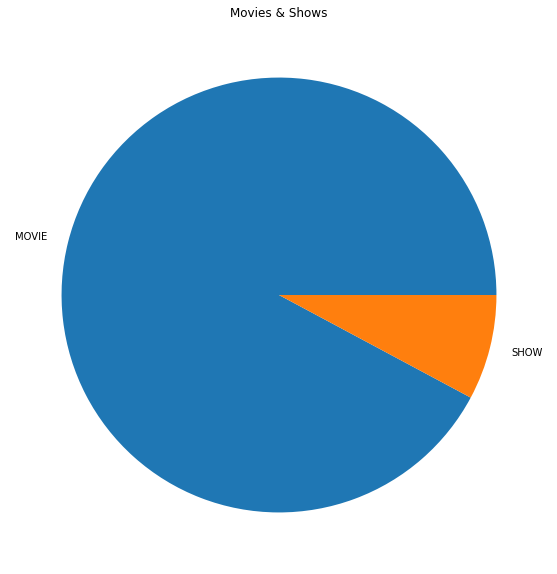

In [23]:
fig = plt.figure(figsize = (10,10))
ax = fig.subplots()
df.type.value_counts().plot(ax=ax, kind='pie')
ax.set_ylabel("")
ax.set_title("Movies & Shows")
plt.show()

We can see that Disney focuses more on Movies than TV Shows. Maybe because Disney has an audience that prefers movies over TV Shows.

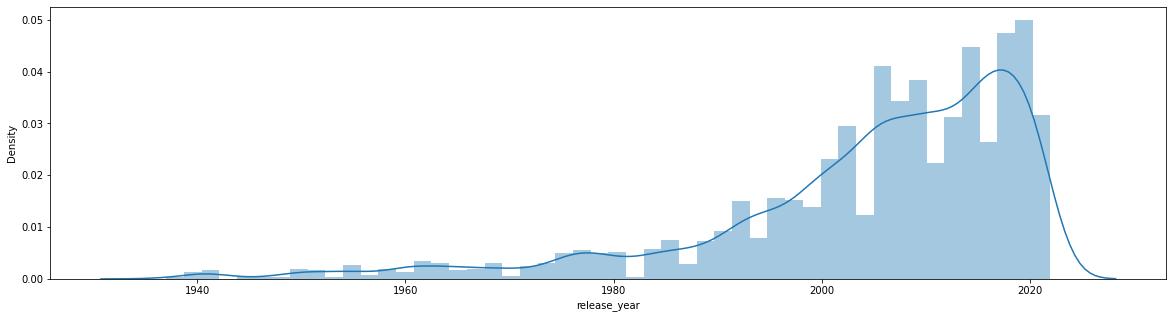

In [24]:
#checking Distribution of years
plt.figure(figsize=(20,5))
sns.distplot(df['release_year'])
plt.show()

In [25]:
print(f'mini year: {df["release_year"].min()} \nmax year:{df["release_year"].max()}') 

mini year: 1937 
max year:2022


The chart is showing the distribution of  movieq & shows over the years. We can interpret that most of the works were made between the year 2000 to 2022.

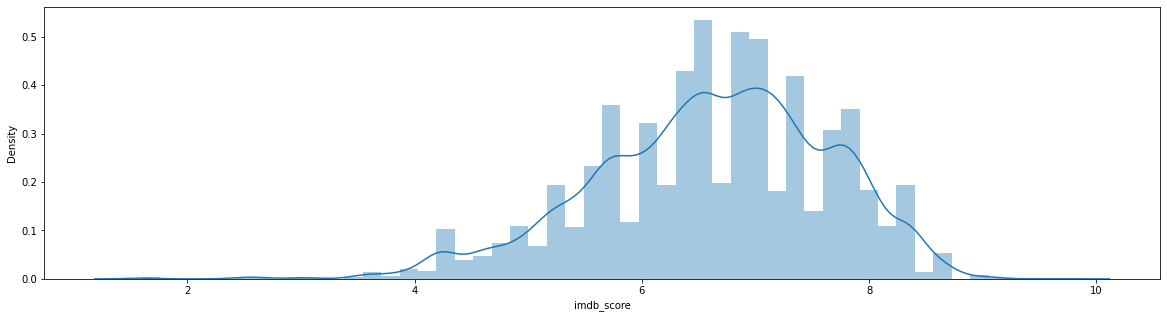

In [26]:
# Distribution of IMDb Rating
plt.figure(figsize=(20,5))
sns.distplot(df['imdb_score'])
plt.show()

# **Building the Model**

In [30]:
# selecting the relevant features for recommendation

selected_features = ['title','type','description','genres','name','release_year']
print(selected_features)

['title', 'type', 'description', 'genres', 'name', 'release_year']


In [32]:
# combining all the 5 selected features

combined_features = df['title']+' '+df['type']+' '+df['description']+' '+df['genres']+' '+df['name']

In [33]:
print(combined_features)

0        Fantasia MOVIE Walt Disney's timeless masterpi...
1        Fantasia MOVIE Walt Disney's timeless masterpi...
2        Fantasia MOVIE Walt Disney's timeless masterpi...
3        Fantasia MOVIE Walt Disney's timeless masterpi...
4        Fantasia MOVIE Walt Disney's timeless masterpi...
                               ...                        
22967    Far From Raven's Home MOVIE Our gang is off fo...
22968    Far From Raven's Home MOVIE Our gang is off fo...
22969    Far From Raven's Home MOVIE Our gang is off fo...
22970    Far From Raven's Home MOVIE Our gang is off fo...
22971    Far From Raven's Home MOVIE Our gang is off fo...
Length: 22972, dtype: object


In [34]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

# converting the text data to feature vectors

vectorizer = TfidfVectorizer()

In [35]:
feature_vectors = vectorizer.fit_transform(combined_features)

In [36]:
print(feature_vectors)

  (0, 18435)	0.15083441384276178
  (0, 4772)	0.2865559534743282
  (0, 6424)	0.04905927955399074
  (0, 6406)	0.03816800453024199
  (0, 854)	0.06342981090707624
  (0, 389)	0.11900962331379754
  (0, 13942)	0.22413073591782076
  (0, 18596)	0.06191635038667619
  (0, 6264)	0.22015958996998716
  (0, 6285)	0.161652805739198
  (0, 17462)	0.1893232469155709
  (0, 9215)	0.0830599097380737
  (0, 2782)	0.22729873214079796
  (0, 14464)	0.22421895723004417
  (0, 8320)	0.22421895723004417
  (0, 11070)	0.08355397601188023
  (0, 18799)	0.03493463327250048
  (0, 3860)	0.11733288038115716
  (0, 13055)	0.1868472602940398
  (0, 18602)	0.08946638825666059
  (0, 16667)	0.15002294377743058
  (0, 17507)	0.1893232469155709
  (0, 799)	0.10353131542432878
  (0, 17117)	0.22729873214079796
  (0, 13671)	0.035430708751006006
  :	:
  (22971, 19209)	0.12997372750078462
  (22971, 7215)	0.12374760695752356
  (22971, 6876)	0.12868241508746536
  (22971, 383)	0.08229419415537008
  (22971, 3627)	0.11391042667550345
  (22971, 

**COSINE SIMILARITY**

In [37]:
# getting the similarity scores using cosine similarity

similarity = cosine_similarity(feature_vectors)

In [38]:
print(similarity)

[[1.         0.92889167 0.86969288 ... 0.03179529 0.03188129 0.03072568]
 [0.92889167 1.         0.90249043 ... 0.03164983 0.03173544 0.03058512]
 [0.86969288 0.90249043 1.         ... 0.0308916  0.03097515 0.02985239]
 ...
 [0.03179529 0.03164983 0.0308916  ... 1.         0.90830098 0.87537766]
 [0.03188129 0.03173544 0.03097515 ... 0.90830098 1.         0.87774533]
 [0.03072568 0.03058512 0.02985239 ... 0.87537766 0.87774533 1.        ]]


In [39]:
print(similarity.shape)

(22972, 22972)


**Getting the movie name from the user**

In [40]:
# getting the movie name from the user

movie_name = input(' Enter your favourite movie name : ')

 Enter your favourite movie name : spider man


In [43]:
# creating a list with all the movie names given in the dataset

list_of_all_titles = sorted(set(df['title'].tolist()))
print(list_of_all_titles)
print(len(list_of_all_titles))

["'Twas the Night", '10 Things I Hate About You', '101 Dalmatian Street', '101 Dalmatians', '101 Dalmatians: The Series', '102 Dalmatians', '12 Dates of Christmas', '20,000 Leagues Under the Sea', '3 Men and a Baby', '3 Men and a Little Lady', '700 Sharks', "A Bug's Life", 'A Celebration of the Music from Coco', 'A Christmas Carol', 'A Goofy Movie', "A Kid in King Arthur's Court", 'A Muppets Christmas: Letters to Santa', 'A Ring of Endless Light', 'A Spark Story', 'A Tale of Two Critters', 'A Wrinkle in Time', 'A.N.T. Farm', 'Adventure Thru the Walt Disney Archives', 'Adventures in Babysitting', 'Adventures in Wonderland', 'African Cats', 'Aladdin', 'Alex & Co.', 'Alexander and the Terrible, Horrible, No Good, Very Bad Day', 'Alice in Wonderland', "Alice's Wonderland Bakery", 'Aliens of the Deep', 'Alley Cats Strike', 'Almost Angels', 'Alvin and the Chipmunks', 'Alvin and the Chipmunks: The Road Chip', "America's Funniest Home Videos", "America's Heart and Soul", 'American Dragon: Jake

In [44]:
import difflib

# finding the close match for the movie name given by the user

find_close_match = difflib.get_close_matches(movie_name, list_of_all_titles)
print(find_close_match)

['Spider-Woman', 'Spider-Man', 'Paperman']


In [53]:
# getting the first closet match
close_match = find_close_match[0]
print(close_match)

# finding the index of the movie with title

#index_of_the_movie = df[df.title == close_match]['id'].values[0]
index_of_the_movie = df[df.title == close_match].index.values[0]
print(index_of_the_movie)
print(df.iloc[1174])

Spider-Woman
1174
id                                                                ts24939
title                                                        Spider-Woman
type                                                                 SHOW
description             When Jessica Drew was bitten by a poisonous sp...
release_year                                                         1979
runtime                                                                21
genres                       ['animation', 'fantasy', 'action', 'family']
production_countries                                               ['US']
seasons                                                                 1
imdb_id                                                         tt0197911
imdb_score                                                            5.8
imdb_votes                                                          790.0
tmdb_popularity                                                    19.081
tmdb_score          

In [54]:
# getting a list of similar movies

similarity_score = list(enumerate(similarity[index_of_the_movie]))
print(similarity_score)

[(0, 0.02175940204184313), (1, 0.021659856493417666), (2, 0.02114094985490303), (3, 0.02114094985490303), (4, 0.021755238594949426), (5, 0.021925809213347504), (6, 0.02194191105360531), (7, 0.02151961496733885), (8, 0.022131945219805008), (9, 0.022027666653751304), (10, 0.022178955565563777), (11, 0.02189507944015088), (12, 0.022065692358529256), (13, 0.021955210137172186), (14, 0.021862081925644546), (15, 0.02226246450380249), (16, 0.03940618205739768), (17, 0.03888871931672117), (18, 0.03996549795936375), (19, 0.040094039490890604), (20, 0.039681193969471985), (21, 0.039359590190632995), (22, 0.03920968180310569), (23, 0.04015941599411077), (24, 0.040337036959786236), (25, 0.03954443710541282), (26, 0.03991186868943336), (27, 0.03965466862915942), (28, 0.03920968180310569), (29, 0.04049988180260082), (30, 0.027418105990853155), (31, 0.02743846172647645), (32, 0.02729316432463382), (33, 0.02698304606444516), (34, 0.02735143339491486), (35, 0.027183700924868798), (36, 0.027371980011941

In [55]:
len(similarity_score)

22972

In [56]:
# sorting the movies based on their similarity score

sorted_similar_movies = sorted(similarity_score, key = lambda x:x[1], reverse = True) 
print(sorted_similar_movies)

[(1174, 1.0), (3387, 0.3367301749282208), (3388, 0.3352744899568168), (3385, 0.33399980610633906), (3389, 0.3306782249756694), (3383, 0.3303746591052398), (3386, 0.33014684139967343), (3390, 0.3237373760499402), (3384, 0.3230665212191998), (19116, 0.3152724791235119), (19111, 0.31381801431938017), (19119, 0.3135713368499277), (19115, 0.31239941542474464), (19117, 0.3116343856527983), (19110, 0.3111825172847746), (19118, 0.3109839524126976), (19120, 0.31017622743461515), (19109, 0.30833242129161953), (19112, 0.30675457029412145), (19113, 0.3066394117063417), (19114, 0.30596837891893414), (19107, 0.3054911562113658), (19108, 0.3020805683276262), (2801, 0.2889489856566167), (2799, 0.28851003163508804), (2798, 0.28482147457579277), (2800, 0.2837814932538282), (13871, 0.27737550877872247), (13869, 0.2649814582442193), (13870, 0.2646477094388891), (13872, 0.26463815498608734), (2741, 0.2644565165896193), (2744, 0.26234205538368677), (2742, 0.25865362615446263), (2739, 0.25843257201720926), (

In [73]:
# print the name of similar movies based on the index

print('Movies suggested for you : \n')
listmovies=[]
i = 1

for movie in sorted_similar_movies:
  index = movie[0]
  title_from_index = df[df.index==index]['title'].values[0]
  if (i<40):
    #print(i, '.',title_from_index)
    #i+=1
    listmovies.append(title_from_index)
    i+=1

listmovies = sorted(set(listmovies))
print(listmovies)

Movies suggested for you : 

["Marvel's Spider-Man", "Marvel's Ultimate Spider-Man", 'Spider-Man', 'Spider-Man Unlimited', 'Spider-Man and His Amazing Friends', 'Spider-Woman']


**Movie Recommendation Sytem**

In [78]:
movie_name = input(' Enter your favourite movie name : ')

list_of_all_titles = df['title'].tolist()

find_close_match = difflib.get_close_matches(movie_name, list_of_all_titles)

close_match = find_close_match[0]

index_of_the_movie = df[df.title == close_match].index.values[0]

similarity_score = list(enumerate(similarity[index_of_the_movie]))

sorted_similar_movies = sorted(similarity_score, key = lambda x:x[1], reverse = True) 

print('Movies suggested for you : \n')

i = 1

for movie in sorted_similar_movies:
  index = movie[0]
  title_from_index = df[df.index==index]['title'].values[0]
  if (i<30):
    listmovies.append(title_from_index)
    i+=1

listmovies = sorted(set(listmovies))
print(f'{len(listmovies)} \n{listmovies}')

 Enter your favourite movie name : fantasy
Movies suggested for you : 

12 
['Avengers: Age of Ultron', 'Captain America: Civil War', 'Fantasia', 'Fantasia 2000', "Marvel's Spider-Man", "Marvel's Ultimate Spider-Man", "Pirates of the Caribbean: At World's End", 'Spider-Man', 'Spider-Man Unlimited', 'Spider-Man and His Amazing Friends', 'Spider-Woman', 'WandaVision']


In [98]:
suggchaeck = df.loc[df['title'] == 'Avengers: Age of Ultron']
data = suggchaeck.drop_duplicates(subset=['title'], keep='first')
data

,id,title,type,description,release_year,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score,person_id,name,role
0,tm74391,Avengers: Age of Ultron,MOVIE,Walt Disney's timeless masterpiece is an extra...,1940,120,"['animation', 'family', 'music', 'fantasy']",['US'],0,tt0032455,7.7,94681.0,57.751,7.4,23433,Deems Taylor,ACTOR
